In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
#path = Path(Config.get_key('data_path')).expanduser()/'handwritten'
path = Path('.')
#bs = 4096
#tfms = get_transforms(do_flip=False)
#data = ImageDataBunch.from_folder(path, train='Train', valid='Validation', ds_tfms=tfms, size=32, bs=bs)
#learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [3]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'NOTHING', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [4]:
#empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms()).normalize(imagenet_stats)
empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms())
learn = create_cnn(empty_data, models.resnet34)
# The model was created as DataParallel, therefore we need to load it as DataParallel for inference.
#learn.model = torch.nn.DataParallel(learn.model)

In [5]:
#learn.path = Path('.')
learn.load('stage-2-resnet34-32px')

In [6]:
""" This works fine as it comes from Validation set. Commenting
img_folder = path/'Validation/J'
img_path = path/'Validation/J/50.jpg'
img_folder.ls()
#img = open_image(data.train_ds.x[50000])
#img = open_image(img_path)
"""

" This works fine as it comes from Validation set. Commenting\nimg_folder = path/'Validation/J'\nimg_path = path/'Validation/J/50.jpg'\nimg_folder.ls()\n#img = open_image(data.train_ds.x[50000])\n#img = open_image(img_path)\n"

In [7]:
#img.show()

In [8]:
#learn.predict(img)

In [9]:
#! wget http://yourstorage.blob.core.windows.net/ficheros/e.png

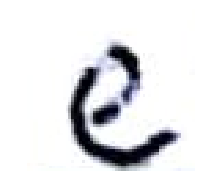

In [10]:
img = open_image("test/e.png")
img.show()

In [11]:
learn.predict(img)

('E',
 tensor(14),
 tensor([1.5759e+00, 1.9666e-01, 1.6646e+01, 8.8614e-01, 1.5967e-01, 3.1661e-02,
         1.0224e-01, 3.2120e+00, 2.1497e-01, 1.1242e-01, 3.2984e+01, 8.5316e-01,
         1.0765e+01, 1.0638e+01, 6.9014e+01, 2.0067e+01, 1.3812e+00, 5.6633e-02,
         3.7234e+00, 3.4439e+00, 7.1019e-01, 2.3700e-01, 2.7162e+00, 4.7832e-01,
         2.5266e+01, 1.0239e+00, 4.6980e-01, 2.1764e+00, 4.6195e+00, 4.7449e+00,
         7.8938e-01, 7.9181e-02, 3.7711e+00, 1.0753e+00, 6.8465e-03, 3.9852e+01]))

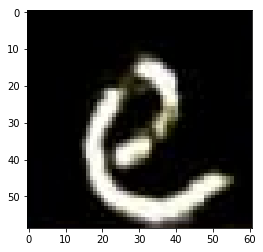

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('test/e.png')
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)

In [13]:
cv2.imwrite('einvert.png',img)

True

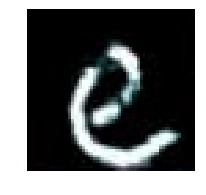

In [14]:
img = open_image("einvert.png")
img.show()

In [15]:
learn.predict(img)

('N',
 tensor(23),
 tensor([4.5263e+00, 5.2898e-01, 4.3285e+00, 3.2673e+01, 2.1942e-01, 4.3567e+00,
         2.5991e+00, 8.5708e-01, 6.9243e-02, 4.0611e-01, 3.3194e+00, 1.1211e+00,
         5.0374e+00, 1.1729e+00, 5.2421e-01, 3.9180e-01, 5.4516e-01, 1.5333e+00,
         1.9390e-01, 9.1215e-01, 2.3824e-01, 1.7032e+00, 2.0691e+01, 5.2193e+01,
         1.5611e+01, 4.7731e-02, 2.4598e-01, 3.9602e-02, 2.9228e+01, 4.8003e-01,
         2.9044e-01, 4.7718e-02, 3.3570e+01, 1.1064e+00, 6.2727e-03, 5.4658e+00]))

In [16]:
img.shape

torch.Size([3, 59, 61])

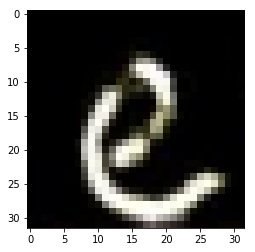

In [17]:
img = cv2.imread('einvert.png')
img = cv2.resize(img, (32,32))
plt.imshow(img)

In [18]:
cv2.imwrite('einvert32x32.png',img)

True

In [19]:
img = open_image("einvert32x32.png")
learn.predict(img)

('NOTHING',
 tensor(24),
 tensor([4.8768e-01, 3.3104e+00, 1.1122e+00, 1.1526e-01, 5.3740e-01, 5.3817e+00,
         2.1145e+00, 2.0191e-01, 1.1501e+00, 3.0510e-01, 3.6907e-01, 2.4095e-01,
         1.3517e+02, 5.4000e-01, 3.6173e+01, 1.5638e+00, 1.2436e+01, 2.1380e-01,
         1.7271e+00, 1.1666e+00, 3.3828e-01, 7.4701e+00, 1.8299e-01, 4.0750e-02,
         1.8376e+02, 2.2628e-01, 2.6838e-01, 2.9485e+00, 4.9021e+00, 2.2657e-01,
         1.9051e-01, 3.6445e-01, 7.4174e-02, 6.0231e-01, 8.4370e-01, 3.8207e-01]))

In [20]:
#! rm 4.png*
#! wget http://yourstorage.blob.core.windows.net/ficheros/4.png

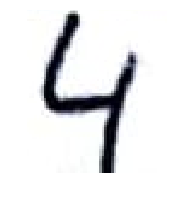

In [21]:
img = open_image("test/4.png")
img.show()

In [22]:
learn.predict(img)

('W',
 tensor(32),
 tensor([3.1466e-04, 4.7222e-02, 9.1854e+01, 3.3844e-01, 3.6693e+01, 4.6907e-04,
         3.9875e+00, 1.7992e+00, 1.0201e-02, 3.2329e-02, 3.8649e+01, 6.1725e+00,
         2.5151e-01, 1.3029e+01, 2.2408e-01, 1.1073e-01, 5.8426e+01, 1.5522e+02,
         7.8046e-02, 9.7646e+01, 2.8366e+00, 3.3683e-01, 4.0367e+00, 7.5739e+01,
         1.8895e+01, 1.6395e-01, 7.4665e+00, 4.9548e+01, 2.0508e-02, 9.4100e-04,
         7.5854e+01, 1.4940e+01, 1.9835e+02, 3.3139e+00, 1.9006e+02, 6.3803e+01]))

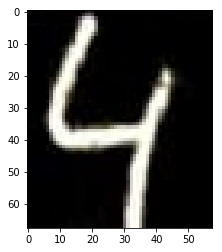

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('test/4.png')
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)

In [24]:
cv2.imwrite('4invert.png',img)

True

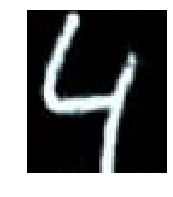

In [25]:
img = open_image("4invert.png")
img.show()

In [26]:
learn.predict(img)

('R',
 tensor(27),
 tensor([2.6468e-03, 1.8268e-01, 7.3478e+03, 1.0950e+00, 1.1258e-02, 2.3988e-02,
         4.5013e-03, 1.3807e+02, 3.5243e-05, 7.4887e-03, 4.3657e+03, 2.9416e-02,
         1.0050e-01, 4.4519e+00, 1.9372e+02, 1.4325e-01, 8.0429e-04, 2.2579e-01,
         8.9304e+00, 9.9406e+00, 3.5550e+00, 3.7468e+00, 6.4779e+00, 6.8180e+00,
         9.8967e-01, 1.3605e+01, 8.9673e-05, 1.4082e+05, 5.3338e-04, 3.5938e+01,
         1.1304e-02, 6.2645e-01, 9.5812e-02, 6.1882e+00, 4.3016e-02, 1.7100e+02]))

In [27]:
img.shape

torch.Size([3, 68, 58])

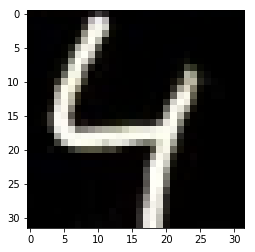

In [28]:
img = cv2.imread('4invert.png')
img = cv2.resize(img, (32,32))
plt.imshow(img)

In [29]:
cv2.imwrite('4invert32x32.png',img)

True

In [30]:
img = open_image("4invert32x32.png")
learn.predict(img)

('4',
 tensor(4),
 tensor([6.4180e-02, 2.0668e+00, 2.1236e-01, 3.4617e-02, 4.5624e+04, 4.8982e-01,
         2.2978e-01, 7.8734e+01, 1.1557e-01, 4.4768e+00, 3.4089e-02, 2.9122e-02,
         2.0684e-01, 1.2309e-01, 5.7927e-02, 7.5238e-02, 3.7871e-01, 1.2779e+00,
         1.0316e+00, 9.0462e-01, 7.1234e+00, 2.0802e+00, 8.3026e+00, 3.4832e+00,
         6.5814e-01, 2.0595e-02, 2.5109e-01, 3.7213e-02, 4.8132e-02, 1.2631e+01,
         1.7806e+02, 1.8363e+01, 2.9958e-01, 2.6907e+00, 5.7272e+03, 2.3653e+00]))

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict(image_path):
    img = cv2.imread(image_path)
    img = cv2.bitwise_not(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    cv2.imwrite('invert.png',img)
    img = open_image("invert.png")
    img.show()
    img = cv2.imread('invert.png')
    img = cv2.resize(img, (32,32))
    plt.imshow(img)
    cv2.imwrite('invert32x32.png',img)
    img = open_image("invert32x32.png")
    return learn.predict(img)

('4',
 tensor(4),
 tensor([6.4180e-02, 2.0668e+00, 2.1236e-01, 3.4617e-02, 4.5624e+04, 4.8982e-01,
         2.2978e-01, 7.8734e+01, 1.1557e-01, 4.4768e+00, 3.4089e-02, 2.9122e-02,
         2.0684e-01, 1.2309e-01, 5.7927e-02, 7.5238e-02, 3.7871e-01, 1.2779e+00,
         1.0316e+00, 9.0462e-01, 7.1234e+00, 2.0802e+00, 8.3026e+00, 3.4832e+00,
         6.5814e-01, 2.0595e-02, 2.5109e-01, 3.7213e-02, 4.8132e-02, 1.2631e+01,
         1.7806e+02, 1.8363e+01, 2.9958e-01, 2.6907e+00, 5.7272e+03, 2.3653e+00]))

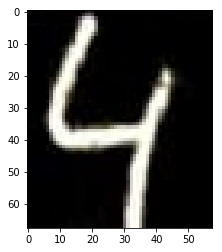

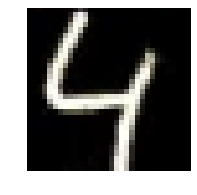

In [37]:
predict('test/4.png')

('NOTHING',
 tensor(24),
 tensor([4.8768e-01, 3.3104e+00, 1.1122e+00, 1.1526e-01, 5.3740e-01, 5.3817e+00,
         2.1145e+00, 2.0191e-01, 1.1501e+00, 3.0510e-01, 3.6907e-01, 2.4095e-01,
         1.3517e+02, 5.4000e-01, 3.6173e+01, 1.5638e+00, 1.2436e+01, 2.1380e-01,
         1.7271e+00, 1.1666e+00, 3.3828e-01, 7.4701e+00, 1.8299e-01, 4.0750e-02,
         1.8376e+02, 2.2628e-01, 2.6838e-01, 2.9485e+00, 4.9021e+00, 2.2657e-01,
         1.9051e-01, 3.6445e-01, 7.4174e-02, 6.0231e-01, 8.4370e-01, 3.8207e-01]))

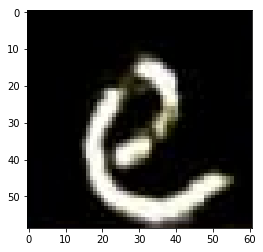

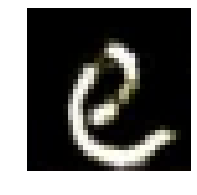

In [38]:
predict('test/e.png')

('NOTHING',
 tensor(24),
 tensor([2.0766e+00, 3.2106e+00, 1.2856e+01, 2.9073e+02, 1.8372e-01, 1.1821e+00,
         3.8909e+00, 6.8262e+00, 2.8605e-01, 1.0812e-02, 5.4748e-01, 5.7861e+01,
         2.2127e-01, 4.2408e+00, 5.2372e-01, 2.0005e-01, 2.7303e-01, 2.4215e-01,
         2.2945e+00, 3.2105e+01, 3.6600e-01, 5.8563e+00, 1.3336e+00, 1.3965e-01,
         6.8700e+04, 3.6509e-01, 4.5633e-02, 5.2103e-02, 1.4066e-01, 7.9887e-01,
         2.8789e-01, 3.2448e-01, 2.1891e-01, 1.2440e-01, 4.5493e+00, 1.6659e+01]))

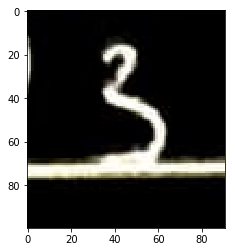

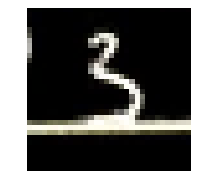

In [39]:
predict('test/3-underline.png')

('U',
 tensor(30),
 tensor([5.4367e-01, 1.7004e+00, 1.6386e+00, 2.5880e-01, 3.6139e-01, 1.8493e+00,
         3.1460e-01, 9.6480e-01, 2.6643e-02, 7.7235e-02, 3.6097e+00, 7.8231e+00,
         5.5552e-01, 1.4816e+01, 2.9577e+00, 9.6500e-02, 2.9502e+00, 4.0972e+00,
         1.1970e+01, 8.4600e+00, 3.0444e+00, 2.6487e+00, 6.6642e+00, 7.3899e+00,
         3.0762e+01, 5.0179e-03, 7.6254e-01, 1.2613e+00, 1.1017e+00, 2.0696e-02,
         5.2578e+01, 1.3634e+00, 3.4155e-01, 3.0129e-01, 5.7864e+00, 5.3626e+00]))

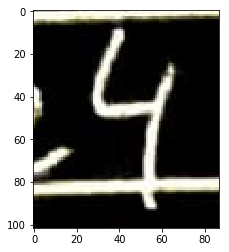

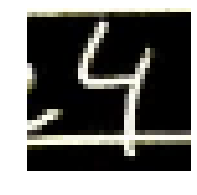

In [40]:
predict('test/4-upper-underline.png')

('NOTHING',
 tensor(24),
 tensor([6.6565e-01, 1.7914e-01, 9.9682e+00, 1.1593e+00, 1.2621e-02, 1.1453e-01,
         4.5288e-01, 7.5877e+00, 9.0899e-01, 2.3668e-03, 7.5412e+00, 2.1803e+01,
         1.5887e-01, 3.3787e+00, 1.2252e+01, 1.1242e+00, 2.6454e-01, 1.9409e+00,
         7.4025e+00, 1.2405e+01, 3.4689e-01, 1.3753e+00, 2.7161e-01, 1.8786e+00,
         7.3341e+02, 4.2137e-01, 2.1011e-01, 3.7099e+00, 1.0287e-01, 6.6511e-01,
         3.6756e+00, 3.2101e-01, 1.7414e-01, 1.3790e+00, 2.3262e-02, 2.1657e+02]))

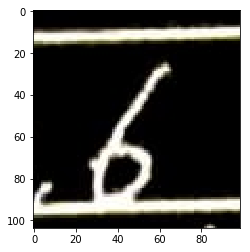

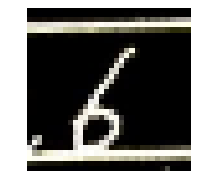

In [41]:
predict('test/6-upper-underline.png')

('NOTHING',
 tensor(24),
 tensor([3.7509e-02, 1.2168e+01, 1.4772e+02, 1.5771e+02, 5.4393e-02, 1.1872e+00,
         3.0275e-02, 1.5258e+02, 1.0194e-01, 1.0025e-01, 1.6460e+00, 6.4648e-01,
         1.0233e+00, 1.9094e-01, 1.4304e+00, 5.5910e+01, 1.2935e+00, 9.3585e-02,
         7.4596e+00, 5.0582e-01, 4.0462e-01, 5.2375e+00, 9.3378e-01, 3.9759e-02,
         1.0257e+03, 5.0842e-01, 1.1834e-01, 1.2097e-01, 2.3351e-01, 2.7622e+00,
         1.6742e-02, 6.8259e-02, 4.9586e-02, 8.7279e-01, 1.7456e+00, 1.9540e+02]))

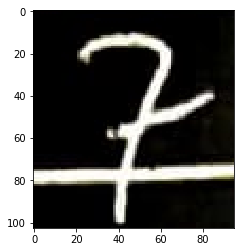

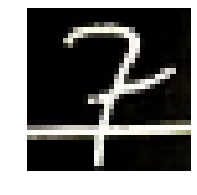

In [43]:
predict('test/7-underline.png')

('A',
 tensor(10),
 tensor([5.1960e+00, 1.9830e-01, 1.0017e+00, 3.0565e-02, 3.2687e+01, 2.5154e-02,
         6.5894e-02, 1.8557e-01, 5.9874e-02, 1.6158e-01, 4.1111e+04, 1.7240e+00,
         5.8965e-01, 4.2348e+02, 8.7243e-01, 5.2294e+01, 2.5367e+00, 1.4493e+00,
         2.9408e-01, 1.0224e-01, 3.3123e+00, 1.0015e+00, 2.7014e+00, 7.3919e-02,
         6.2510e+00, 1.9735e+01, 5.1557e+00, 2.9908e+00, 5.9987e-01, 4.9374e+00,
         3.7425e-03, 5.1489e-02, 1.5627e-01, 2.9242e+00, 9.6838e-02, 4.6306e-01]))

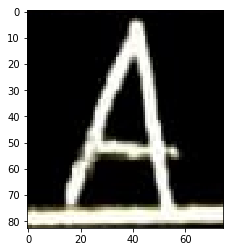

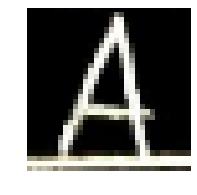

In [44]:
predict('test/a-underline.png')

('E',
 tensor(14),
 tensor([1.5240e+00, 4.2863e+00, 4.5667e-01, 3.0221e-02, 4.1578e-01, 1.0468e+01,
         2.0964e+00, 7.4063e-02, 3.0383e+00, 2.9019e-01, 1.8610e+00, 6.5026e-01,
         8.7151e+00, 2.9183e+01, 1.9695e+02, 4.9716e+01, 5.3118e-01, 8.3738e-01,
         5.8204e+00, 7.9163e-01, 1.3239e+00, 3.5281e+00, 1.6901e-01, 1.3244e-01,
         8.7434e+00, 4.6650e-01, 1.8526e-01, 1.0970e+00, 8.2545e+00, 9.3763e+00,
         1.1440e-01, 2.0262e-01, 1.5349e-01, 5.0075e-01, 6.1100e-01, 1.2930e-01]))

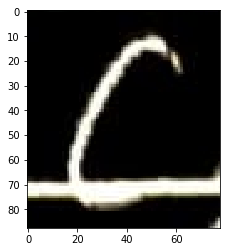

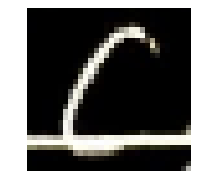

In [45]:
predict('test/c-underline.png')

('NOTHING',
 tensor(24),
 tensor([6.6478e-01, 1.2968e+00, 1.1642e+00, 1.4673e+00, 6.9823e+00, 1.4369e-01,
         5.7031e-02, 9.7101e+01, 5.0917e-01, 1.9246e-01, 2.0986e+00, 7.2397e-01,
         1.8668e-01, 8.0540e-01, 2.7448e-01, 1.7717e+01, 2.9088e-01, 8.3595e-01,
         1.2131e+00, 2.4541e+00, 5.8757e+00, 1.3404e+00, 3.8312e+00, 2.4975e-01,
         3.3439e+04, 7.0590e-01, 5.9566e-01, 4.1658e-01, 4.7768e-02, 7.2970e+00,
         2.1347e-01, 1.2229e+00, 4.1740e-01, 6.5452e+00, 3.7771e+01, 8.1279e+00]))

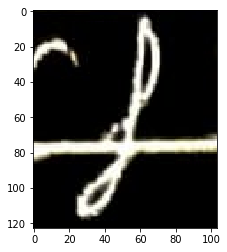

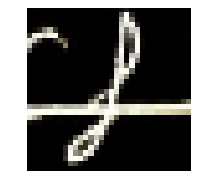

In [46]:
predict('test/f-underline.png')

('NOTHING',
 tensor(24),
 tensor([2.9952e+00, 1.1173e+00, 6.1560e-01, 3.1523e-01, 1.0550e+01, 1.6654e-01,
         2.0452e-01, 3.5648e+00, 1.3859e+00, 1.3425e-02, 1.0519e+00, 1.5092e+00,
         6.9425e-02, 1.5816e+01, 9.2930e-01, 9.8956e-01, 1.1763e-01, 1.3268e+01,
         1.9152e+00, 7.5142e+00, 2.3000e+00, 9.3552e-01, 4.4525e-01, 2.5540e-01,
         3.4584e+05, 1.2402e-01, 6.7318e-01, 1.1949e-01, 2.6067e-02, 5.8029e+00,
         2.0989e+00, 1.7637e+00, 5.0743e+00, 2.2721e+01, 2.5221e+01, 4.9064e+00]))

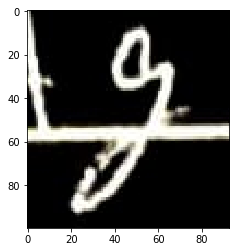

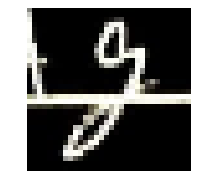

In [47]:
predict('test/g-underline-2.png')

('NOTHING',
 tensor(24),
 tensor([5.4314e-01, 3.7619e-02, 2.3310e-01, 2.8672e-02, 4.4994e-01, 9.6566e-02,
         1.5764e+00, 8.3994e-02, 4.0310e+00, 3.0234e-02, 4.3890e+01, 8.4801e+01,
         4.4616e-01, 1.2497e+01, 2.9098e+01, 1.8760e+01, 1.2604e+01, 1.7025e+01,
         3.6871e-01, 5.7396e-01, 7.8184e+00, 6.9264e-01, 1.4120e+00, 3.2159e-02,
         3.1019e+07, 1.2859e+01, 4.0897e+01, 2.9208e+01, 2.2539e-01, 3.1461e-01,
         1.0460e-01, 5.0532e-01, 2.4421e+00, 3.1946e-01, 7.6564e-02, 9.2251e-01]))

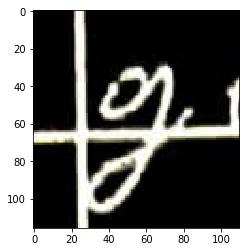

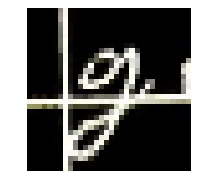

In [48]:
predict('test/g-underline.png')